In [1]:
# Initial imports
## This came from the Starter Code uploaded to the classe repo.

import os
import requests
import pandas as pd

In [2]:
## I was getting some error here, so I split the frame to work on the individual errors "as they came up".

from dotenv import load_dotenv
import alpaca_trade_api as tradeapi

In [3]:
## dotenv wasn't working properly; I had to do a pip install and restart the kernel.
## It works!

In [4]:
from MCForecastTools import MCSimulation

%matplotlib inline

In [5]:
## MCForecastTools had some errors. Deleted the .py file and re-copied the most recent version from the class repo.
## File saved as .py.py; erased the second ".py".
## It works!

In [6]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

In this section of the challenge, you will create a personal finance planner application. To develop the personal finance planner prototype, you should take into account the following assumptions:<br>
<ul>
<li>The average household income for each member of the credit union is $12,000.</li>
<li>Every union member has a savings portfolio composed of cryptocurrencies, stocks and bonds:</li>
<li>Assume the following amount of crypto assets: 1.2 BTC and 5.3 ETH.</li>
<li>Assume the following amount of shares in stocks and bonds: 50 SPY (stocks) and 200 AGG (bonds).</li>
</ul>

In [7]:
## copied the instructions (above) from the homework page, so I could avoid going back and forth.

### Collect Crypto Prices Using the `requests` Library

In [8]:
# Set current amount of crypto assets
## creating a dataframe with the asset amounts

crypto_data = {
    "Coin_Amounts": [1.2, 5.3]
}

## from reading ahead, it looks like we're calling the coin prices tickers, also, so I'm going to stick with that terminology.
## 
tickers = ["BTC", "ETH"]

# Create the shares DataFrame
df_coins = pd.DataFrame(crypto_data, index=tickers)

# Display shares data
df_coins

,Coin_Amounts
BTC,1.2
ETH,5.3


In [9]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/"

In [10]:
# Fetch current BTC price
## I'm going to split this cell so it's easier for me to follow and troubleshoot.

btc_price_get = requests.get(btc_url)
btc_json = btc_price_get.json()
print(btc_json)

{'data': {'1': {'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'website_slug': 'bitcoin', 'rank': 1, 'circulating_supply': 18726125, 'total_supply': 18726125, 'max_supply': 21000000, 'quotes': {'USD': {'price': 37923.0, 'volume_24h': 34303123636, 'market_cap': 714029646392, 'percentage_change_1h': -2.16532367852955, 'percentage_change_24h': 0.974773126305218, 'percentage_change_7d': -1.86246979857843, 'percent_change_1h': -2.16532367852955, 'percent_change_24h': 0.974773126305218, 'percent_change_7d': -1.86246979857843}}, 'last_updated': 1622770168}}, 'metadata': {'timestamp': 1622770168, 'num_cryptocurrencies': 1294, 'error': None}}


In [11]:
## That's not super helpful/easy to read.
## Trying it without the print()
btc_json

{'data': {'1': {'id': 1,
   'name': 'Bitcoin',
   'symbol': 'BTC',
   'website_slug': 'bitcoin',
   'rank': 1,
   'circulating_supply': 18726125,
   'total_supply': 18726125,
   'max_supply': 21000000,
   'quotes': {'USD': {'price': 37923.0,
     'volume_24h': 34303123636,
     'market_cap': 714029646392,
     'percentage_change_1h': -2.16532367852955,
     'percentage_change_24h': 0.974773126305218,
     'percentage_change_7d': -1.86246979857843,
     'percent_change_1h': -2.16532367852955,
     'percent_change_24h': 0.974773126305218,
     'percent_change_7d': -1.86246979857843}},
   'last_updated': 1622770168}},
 'metadata': {'timestamp': 1622770168,
  'num_cryptocurrencies': 1294,
  'error': None}}

In [12]:
## Much better!
## Now, I just need to isolate the price.
print(btc_json["data"]["1"]["quotes"]["USD"]["price"])

37923.0


In [13]:
## That just shows me the price. I need to set a variable for BTC price.
btc_price = (btc_json["data"]["1"]["quotes"]["USD"]["price"])
btc_price

37923.0

In [14]:
## It works!

In [15]:
# Fetch current ETH price
## Do the same thing I did above for BTC, but change everything to ETH.
eth_price_get = requests.get(eth_url)
eth_json = eth_price_get.json()
eth_json

{'data': {'1027': {'id': 1027,
   'name': 'Ethereum',
   'symbol': 'ETH',
   'website_slug': 'ethereum',
   'rank': 2,
   'circulating_supply': 116146531,
   'total_supply': 116146531,
   'max_supply': 0,
   'quotes': {'USD': {'price': 2733.53,
     'volume_24h': 36490485565,
     'market_cap': 318759041524,
     'percentage_change_1h': -2.8518015240251,
     'percentage_change_24h': 0.804189516382164,
     'percentage_change_7d': -0.344931723823493,
     'percent_change_1h': -2.8518015240251,
     'percent_change_24h': 0.804189516382164,
     'percent_change_7d': -0.344931723823493}},
   'last_updated': 1622770135}},
 'metadata': {'timestamp': 1622770135,
  'num_cryptocurrencies': 1294,
  'error': None}}

In [16]:
## I got an error, so I split the cells to troubleshoot.
## reading eth_json shows that the data structure is the same, but the values aren't identical.
## the "1" in the BTC json reads "1027" here. Making the changes.
eth_price = (eth_json["data"]["1027"]["quotes"]["USD"]["price"])
eth_price

2733.53

In [17]:
## It works!

In [18]:
# Compute current value of my crpto
## I need to get the amount of coins from my df_coins dataframe, then multiply that by the BTC and ETH prices.
## My BT are at index position 0, I can get the values from the Coin_Amounts column at position 0, then multiply it by btc_price to get my btc_value
btc_value = df_coins["Coin_Amounts"].values[0] * btc_price
btc_value

45507.6

In [19]:
## Now I do the same thing for ETH, which is at position 1.
eth_value = df_coins["Coin_Amounts"].values[1] * eth_price
eth_value

14487.709

In [20]:
## I don't like that, so I'm rounding it.
round(eth_value, 2)

14487.71

In [21]:
# Print current crypto wallet balance
## Reading ahead, I need to print out the number of shares I have as a variable, not "just" a value.
## I got the value using df_coins["Coin_Amounts"].values[0] before.
## I'm creating a variable called my_btc using the above code to satisfy the starter code.

my_btc = df_coins["Coin_Amounts"].values[0]
my_btc

1.2

In [22]:
## Now I'll do the same thing for ETH.
my_eth = df_coins["Coin_Amounts"].values[1]
my_eth

5.3

In [23]:
## This is from the starter code.
print(f"The current value of your {my_btc} BTC is ${btc_value:0.2f}.")

The current value of your 1.2 BTC is $45507.60.


In [24]:
## This is from the starter code.
print(f"The current value of your {my_eth} ETH is ${eth_value:0.2f}.")

The current value of your 5.3 ETH is $14487.71.


In [25]:
## I want to display a total value of crypto holdings, mainly just for the reps.
## I'm adding the 2 value variables.
print(f"The total value of your crypto is currently ${btc_value + eth_value:0.2f}.")

The total value of your crypto is currently $59995.31.


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

Important: Remember to create a .env file in your working directory to store the values of your Alpaca API key and Alpaca secret key.<br>

<ul>
    <li>Create two variables named my_agg and my_spy and set them equal to 200 and 50, respectively.</li>
    <li>Set the Alpaca API key and secret key variables, then create the Alpaca API object using the tradeapi.REST function from the Alpaca SDK.</li>
    <li>Format the current date as ISO format. You may change the date set in the starter code to the current date.</li>
    <li>Get the current closing prices for SPY and AGG using Alpaca's get_barset() function. Transform the function's response to a Pandas DataFrame and preview the data.</li>
    <li>Pick the SPY and AGG close prices from the Alpaca's get_barset() DataFrame response and store them as Python variables. Print the closing values for validation.</li>
    <li>Compute the value in dollars of the current amount of shares and print the results.
</ul>

In [26]:
## First thing, I want to load my api keys.
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [27]:
# Current amount of shares
## as above, I'm creating a dataframe with the asset amounts

aggspy_data = {
    "Amounts": [200, 50]
}

## from reading ahead, it looks like we're calling the coin prices tickers, also, so I'm going to stick with that terminology.
## 
aggspy_tickers = ["AGG", "SPY"]

# Create the shares DataFrame
df_aggspy = pd.DataFrame(aggspy_data, index=aggspy_tickers)

# Display shares data
df_aggspy

,Amounts
AGG,200
SPY,50


In [28]:
# Set Alpaca API key and secret
## Already done (see above).

In [29]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [30]:
# Format current date as ISO format
## from the student-do, I found today = pd.Timestamp("2020-07-14", tz="America/New_York").isoformat()
## that's not the current date, but I found this in a Google search, so I'm going to start here to "get" the current date.

from datetime import datetime
my_date = datetime.now()
print(my_date.isoformat())

2021-06-03T20:32:10.663744


In [31]:
# Set the tickers
## already done, above.
print(aggspy_tickers)

['AGG', 'SPY']


In [32]:
# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

In [33]:
# Get current closing prices for SPY and AGG
aggspy_portfolio = alpaca.get_barset(
    aggspy_tickers,
    timeframe,
).df

# Preview DataFrame
aggspy_portfolio

AGG                                        SPY  \
                             open    high      low    close   volume    open   
time                                                                           
2021-01-11 00:00:00-05:00  117.02  117.05  116.890  116.890  5047096  377.85   
2021-01-12 00:00:00-05:00  116.82  116.99  116.680  116.980  5103382  378.89   
2021-01-13 00:00:00-05:00  117.63  117.63  117.080  117.360  5686592  378.69   
2021-01-14 00:00:00-05:00  117.37  117.45  117.080  117.150  5311077  380.59   
2021-01-15 00:00:00-05:00  117.34  117.36  117.180  117.260  4776104  376.72   
...                           ...     ...      ...      ...      ...     ...   
2021-05-27 00:00:00-04:00  114.61  114.62  114.450  114.545  4826895  420.17   
2021-05-28 00:00:00-04:00  114.55  114.68  114.500  114.510  6186451  420.97   
2021-06-01 00:00:00-04:00  114.40  114.40  114.164  114.340  5655159  422.57   
2021-06-02 00:00:00-04:00  114.45  114.51  114.300  114.485  5649317  420.37   
2021-06-03 00:00:00-04:00  114.31  114.46  114.210  114.210  3270096  417.87   

                                                               
                             high       low   close    volume  
time                                                           
2021-01-11 00:00:00-05:00  380.58  377.7189  378.74  44814805  
2021-01-12 00:00:00-05:00  379.86  376.3600  378.81  45364896  
2021-01-13 00:00:00-05:00  380.86  377.8500  379.76  38355050  
2021-01-14 00:00:00-05:00  381.13  378.1000  378.45  41045335  
2021-01-15 00:00:00-05:00  377.58  373.7000  375.68  78405054  
...                           ...       ...     ...       ...  
2021-05-27 00:00:00-04:00  420.72  418.9851  419.69  48411613  
2021-05-28 00:00:00-04:00  421.25  419.7900  420.02  49200328  
2021-06-01 00:00:00-04:00  422.72  419.2000  419.63  47607950  
2021-06-02 00:00:00-04:00  421.23  419.2900  420.38  41250387  
2021-06-03 00:00:00-04:00  419.99  416.2800  418.86  51582905  

[100 rows x 10 columns]

In [34]:
# Pick AGG and SPY close prices
## I don't want to mess with the aggspy_portfolio df, so I'm going to create a new df for aggspy closing prices.
aggspy_closing_prices = pd.DataFrame()
aggspy_closing_prices

""


In [35]:
## It works!
## Now, I need to get the closing prices of AGG and SPY
aggspy_closing_prices["AGG"] = aggspy_portfolio["AGG"]["close"]
aggspy_closing_prices["SPY"] = aggspy_portfolio["SPY"]["close"]

In [36]:
## Let's see f that worked.
aggspy_closing_prices.head()

,AGG,SPY
time,,
2021-01-11 00:00:00-05:00,116.89,378.74
2021-01-12 00:00:00-05:00,116.98,378.81
2021-01-13 00:00:00-05:00,117.36,379.76
2021-01-14 00:00:00-05:00,117.15,378.45
2021-01-15 00:00:00-05:00,117.26,375.68


In [37]:
## It works!

In [38]:
## I don't think I need the time element, so I'll drop that from the closing date/index.
aggspy_closing_prices.index = aggspy_closing_prices.index.date

In [39]:
## Let's see if that worked.
aggspy_closing_prices.head()

,AGG,SPY
2021-01-11,116.89,378.74
2021-01-12,116.98,378.81
2021-01-13,117.36,379.76
2021-01-14,117.15,378.45
2021-01-15,117.26,375.68


In [40]:
## It worked!

In [41]:
# Print AGG and SPY close prices
## I want the AGG and SPY closing prices at index position 0.
## As I did above, I'm going to create a variable from the value at index position 0.

agg_close_price = aggspy_closing_prices["AGG"].values[0]
spy_close_price = aggspy_closing_prices["SPY"].values[0]

In [42]:
## Now, to see if that worked.
## First, print agg_close_price.
agg_close_price

116.89

In [43]:
## Great!
## Now, I'll print spy_close_price.
spy_close_price

378.74

In [44]:
print(f"Current AGG closing price: ${agg_close_price}.")
print(f"Current SPY closing price: ${spy_close_price}.")

Current AGG closing price: $116.89.
Current SPY closing price: $378.74.


In [45]:
# Compute the current value of shares
## Reading ahead, I need to print out the number of shares I have as a variable, not "just" a value.
## I got the value using df_aggspy["Amounts"].values[0] before (edited from the crypto section).
## I'm creating a variable called my_agg using the above code to satisfy the starter code.

my_agg = df_aggspy["Amounts"].values[0]
my_agg

200

In [46]:
## Now, I do the same thing for SPY.

my_spy = df_aggspy["Amounts"].values[1]
my_spy

50

In [47]:
## Now, I create a variable called my_spy_value that reflects my # of shares * closing price.
## First, I calculate for AGG.
my_agg_value = my_agg * agg_close_price
my_agg_value

23378.0

In [48]:
## Now for SPY.
my_spy_value = my_spy * spy_close_price
my_spy_value

18937.0

In [49]:
# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}.")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}.")

The current value of your 50 SPY shares is $18937.00.
The current value of your 200 AGG shares is $23378.00.


In [50]:
## I want to display a total value of AGG and SPY holdings, mainly just for the reps.
## I'm adding the 2 value variables.
print(f"The total value of your stocks and bonds is currently ${my_agg_value + my_spy_value:0.2f}.")

The total value of your stocks and bonds is currently $42315.00.


### Savings Health Analysis

In [51]:
## Copied from the HW assignment.
## In this section, you will assess the financial health of the credit union's members.

In [52]:
# Set monthly household income
## Create a variable called monthly_income and set its value to 12000.
monthly_income = 12000

In [53]:
# Create savings DataFrame
## To analyze savings health, create a DataFrame called df_savings with two rows.
## Store the total value in dollars of the crypto assets in the first row and the total value of the shares in the second row.
## Hint: The df_savings DataFrame should have one column named amount and two rows where crypto and shares are the index values.

## I need to create the information that will go into df_savings.

savings = {
    "Amounts": [btc_value + eth_value, my_agg_value + my_spy_value]
}

## Now I need to set the assets.

assets = ["Crypto","Shares"]

In [54]:
# Display savings DataFrame
df_savings = pd.DataFrame(savings, index = assets)
df_savings

,Amounts
Crypto,59995.309
Shares,42315.000


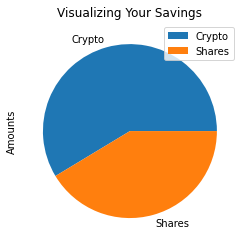

In [55]:
# Plot savings pie chart
df_savings.plot.pie(y = "Amounts", title = "Visualizing Your Savings");

In [56]:
# Set ideal emergency fund.
## According to the assignment: An ideal emergency fund should be equal to 3x your monthly income.
emergency_fund = monthly_income * 3
emergency_fund

36000

In [57]:
# Calculate total amount of savings
## I need to add the amounts together from my df_savings df.
## I'm going to use the .sum function.

total_savings = df_savings.sum().item()

In [58]:
## Now, to see if it worked.

total_savings

102310.30900000001

In [59]:
## It works!

In [60]:
# Validate saving health
## From the Homework:  Use if conditional statements to validate if the current savings are enough for an emergency fund.

if total_savings > emergency_fund:
    print("You have enough money in your emergency fund.")
else:
    print(f"You do not have enough in your emergency fund. You still neeed to save {round(emergency_fund - total_savings, 2)}.")

You have enough money in your emergency fund.


In [61]:
## It works!

## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [62]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen.
## Setting the starter code to 5 years abck from current date (01JUN21).
start_date = pd.Timestamp('2016-06-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-06-01', tz='America/New_York').isoformat()

In [63]:
# Get 5 years' worth of historical data for SPY and AGG
## From above, we already have this in a variable called aggspy_tickers.
## Let's make sure it's still there.
aggspy_tickers

['AGG', 'SPY']

In [64]:
## Still there!

In [65]:
## Now, like above, I need to see if my variable "timeframe" is still set to 1 day.
timeframe

'1D'

In [66]:
## Still there!

In [67]:
## Now, I need to get the last 5 years of data. 
## I kept getting errors using 1260 days, because my free account is only good for 1000 days, so I just ran with that.
## From reading ahead in the starter code, I need to name this df_stock_data.
## I found get_barset on Google.

df_stock_data = alpaca.get_barset(
    aggspy_tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

In [68]:
# Display sample data
## "See if it worked," in other words.
df_stock_data.head()

AGG                                        \
                             open      high     low    close     volume   
time                                                                      
2017-06-09 00:00:00-04:00  109.51  109.6300  109.46  109.560  1356020.0   
2017-06-12 00:00:00-04:00  109.51  109.6958  109.47  109.555  1184601.0   
2017-06-13 00:00:00-04:00  109.43  109.6000  109.43  109.580  1324388.0   
2017-06-14 00:00:00-04:00  110.00  110.1800  109.85  109.950  2304819.0   
2017-06-15 00:00:00-04:00  109.90  109.9000  109.78  109.870  1938779.0   

                              SPY                                        
                             open    high       low   close      volume  
time                                                                     
2017-06-09 00:00:00-04:00     NaN     NaN       NaN     NaN         NaN  
2017-06-12 00:00:00-04:00  243.14  243.42  242.3800  243.34  57096569.0  
2017-06-13 00:00:00-04:00  243.99  244.61  243.5799  244.52  43470532.0  
2017-06-14 00:00:00-04:00  244.86  244.87  243.2900  244.26  55098826.0  
2017-06-15 00:00:00-04:00  242.68  243.91  242.3600  243.79  51523068.0

In [69]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
## Most of this was copied from the student dos, with the variables changed to suit this exercise.
## From the assignment page, I'm to use a 40/60 portfolio using the AGG SPY tickers.
## Making sure to convert the API output to a DataFrame and preview the output.

MC_30yr = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [70]:
# Printing the simulation input data
## I had to ask for help on this one, I was just typing "MC_30yr" without the .portfolio_data
## added .portfolio_data, and it looks "correct" now.
MC_30yr.portfolio_data.head()

AGG                                        \
                             open      high     low    close     volume   
time                                                                      
2017-06-09 00:00:00-04:00  109.51  109.6300  109.46  109.560  1356020.0   
2017-06-12 00:00:00-04:00  109.51  109.6958  109.47  109.555  1184601.0   
2017-06-13 00:00:00-04:00  109.43  109.6000  109.43  109.580  1324388.0   
2017-06-14 00:00:00-04:00  110.00  110.1800  109.85  109.950  2304819.0   
2017-06-15 00:00:00-04:00  109.90  109.9000  109.78  109.870  1938779.0   

                                           SPY                            \
                          daily_return    open    high       low   close   
time                                                                       
2017-06-09 00:00:00-04:00          NaN     NaN     NaN       NaN     NaN   
2017-06-12 00:00:00-04:00    -0.000046  243.14  243.42  242.3800  243.34   
2017-06-13 00:00:00-04:00     0.000228  243.99  244.61  243.5799  244.52   
2017-06-14 00:00:00-04:00     0.003377  244.86  244.87  243.2900  244.26   
2017-06-15 00:00:00-04:00    -0.000728  242.68  243.91  242.3600  243.79   

                                                    
                               volume daily_return  
time                                                
2017-06-09 00:00:00-04:00         NaN          NaN  
2017-06-12 00:00:00-04:00  57096569.0          NaN  
2017-06-13 00:00:00-04:00  43470532.0     0.004849  
2017-06-14 00:00:00-04:00  55098826.0    -0.001063  
2017-06-15 00:00:00-04:00  51523068.0    -0.001924

In [71]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
## Again, this is almost directly copied from the student dos.

MC_30yr.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997380,0.997968,0.999178,1.010805,1.002920,0.980124,0.997879,0.994384,0.995964,0.997136,...,1.006744,0.999634,0.992480,0.997204,1.004745,0.991084,1.000902,1.007710,1.009821,0.996765
2,0.998915,1.003135,1.000974,0.997080,1.003241,0.987534,1.007176,0.991603,1.005569,0.985808,...,1.010336,0.997714,0.980855,0.991819,0.994023,0.993076,1.010444,1.008766,1.022340,1.007047
3,1.010619,1.001951,1.004065,0.994022,1.001089,1.001842,1.003516,0.970614,1.006014,0.987891,...,1.010325,1.003292,0.986406,0.989619,0.997777,0.997695,1.009696,1.026286,1.016494,1.010544
4,1.021537,0.999062,1.001799,0.995967,1.006927,1.008612,1.007863,0.971618,1.013767,0.985214,...,1.007093,1.006584,0.977227,0.982019,0.996505,1.007140,0.998094,1.028893,0.998705,1.013233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,16.356110,27.152974,57.882081,23.577301,11.937127,21.514312,26.763417,36.222111,21.025464,8.884916,...,32.871114,14.428430,53.380877,12.144720,23.171771,8.994652,13.635591,6.803151,13.010356,8.606885
7557,16.426135,27.002721,58.096788,23.422730,11.995193,21.686289,27.041572,36.573568,21.124660,8.839263,...,32.814509,14.571289,53.234616,12.318692,23.037591,8.967101,13.452977,6.809260,12.958151,8.632072
7558,16.469854,26.924460,58.466413,23.662628,12.031616,21.555503,27.139704,37.097580,21.101672,8.868467,...,33.070501,14.398253,52.485395,12.446049,22.907675,8.997836,13.260076,6.844584,12.977460,8.649843
7559,16.449534,26.992187,57.551950,23.602567,12.144676,21.337900,27.205234,36.814273,21.466171,9.012312,...,32.930837,14.391536,51.664116,12.487972,23.095508,9.046992,13.258099,6.877926,12.967764,8.570218


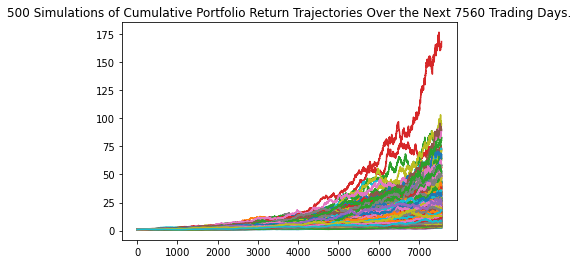

In [72]:
# Plot simulation outcomes
## Again, right out of the student dos.
## I had to Google how to get it to sshow bigger with figure/figsize. Gave up on that.
## tried line_plot = MC_30yr.plot_simulation(figsize=(10, 5)), but that didn't work.
## Gave up on it. (You can zoom in- LOL!)

line_plot = MC_30yr.plot_simulation()

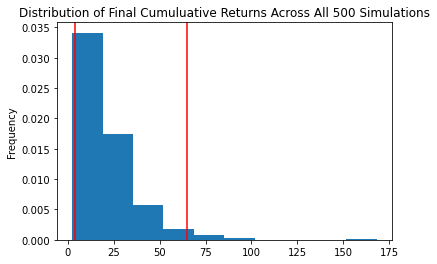

In [73]:
# Plot probability distribution and confidence intervals
## Plotting probability distribution and confidence intervals.
distribution = MC_30yr.plot_distribution()

### Retirement Analysis

In [74]:
# Fetch summary statistics from the Monte Carlo simulation results.
## From speaking with the TAs, it looks like this is supposed to be the cumulative returns summary.
## Found this function on Google.

MC_30yr_cumret = MC_30yr.summarize_cumulative_return()

In [75]:
## Let's see if that works.
MC_30yr_cumret

count           500.000000
mean             21.102389
std              16.620512
min               2.274454
25%              10.370422
50%              16.709328
75%              26.121305
max             168.205357
95% CI Lower      3.902479
95% CI Upper     64.847487
Name: 7560, dtype: float64

In [76]:
## It works!

### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [77]:
# Set initial investment
## From the starter code, we know this is $20,000
investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
## This is right out of the classwork, again.
## We want the data from the cumret data at position 8 and 9 (because it starts at position 0)
## These are dollars and cents, so I'll round to 2 decimals.

investment_95low = round(MC_30yr_cumret[8] * investment,2)
investment_95high = round(MC_30yr_cumret[9] * investment,2)

In [78]:
## Let's see if that works.
## First investment_95high...
print(investment_95high)

1296949.74


In [79]:
## ... now, investment_95low.
investment_95low

78049.58

In [80]:
# Print results
print(f"Given an initial investment of ${investment}, there is a 95% chance this portfolio will be worth between ${investment_95low} and ${investment_95high} in 30 years.")

Given an initial investment of $20000, there is a 95% chance this portfolio will be worth between $78049.58 and $1296949.74 in 30 years.


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [81]:
## From the homework assignment:
## Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a 50% increase in the initial investment.

## First, I need to calculate the new investment (to get "50% more", I need to multiply by 1.5)
new_investment = investment * 1.5
new_investment

30000.0

In [82]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
## Same as above, ust using the new_investment variable.

new_investment_95low = round(MC_30yr_cumret[8] * new_investment,2)
new_investment_95high = round(MC_30yr_cumret[9] * new_investment,2)

In [83]:
## Let's look at those numbers.
## First, new_investment_95high ...
new_investment_95high

1945424.61

In [84]:
## ... now, investment_95low.
investment_95low

78049.58

In [85]:
# Print results
print(f"Given an initial investment of ${new_investment}, there is a 95% chance this portfolio will be worth between ${new_investment_95low} and ${new_investment_95high} in 30 years.")

Given an initial investment of $30000.0, there is a 95% chance this portfolio will be worth between $117074.38 and $1945424.61 in 30 years.


In [86]:
## It works!